<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

<AxesSubplot: >

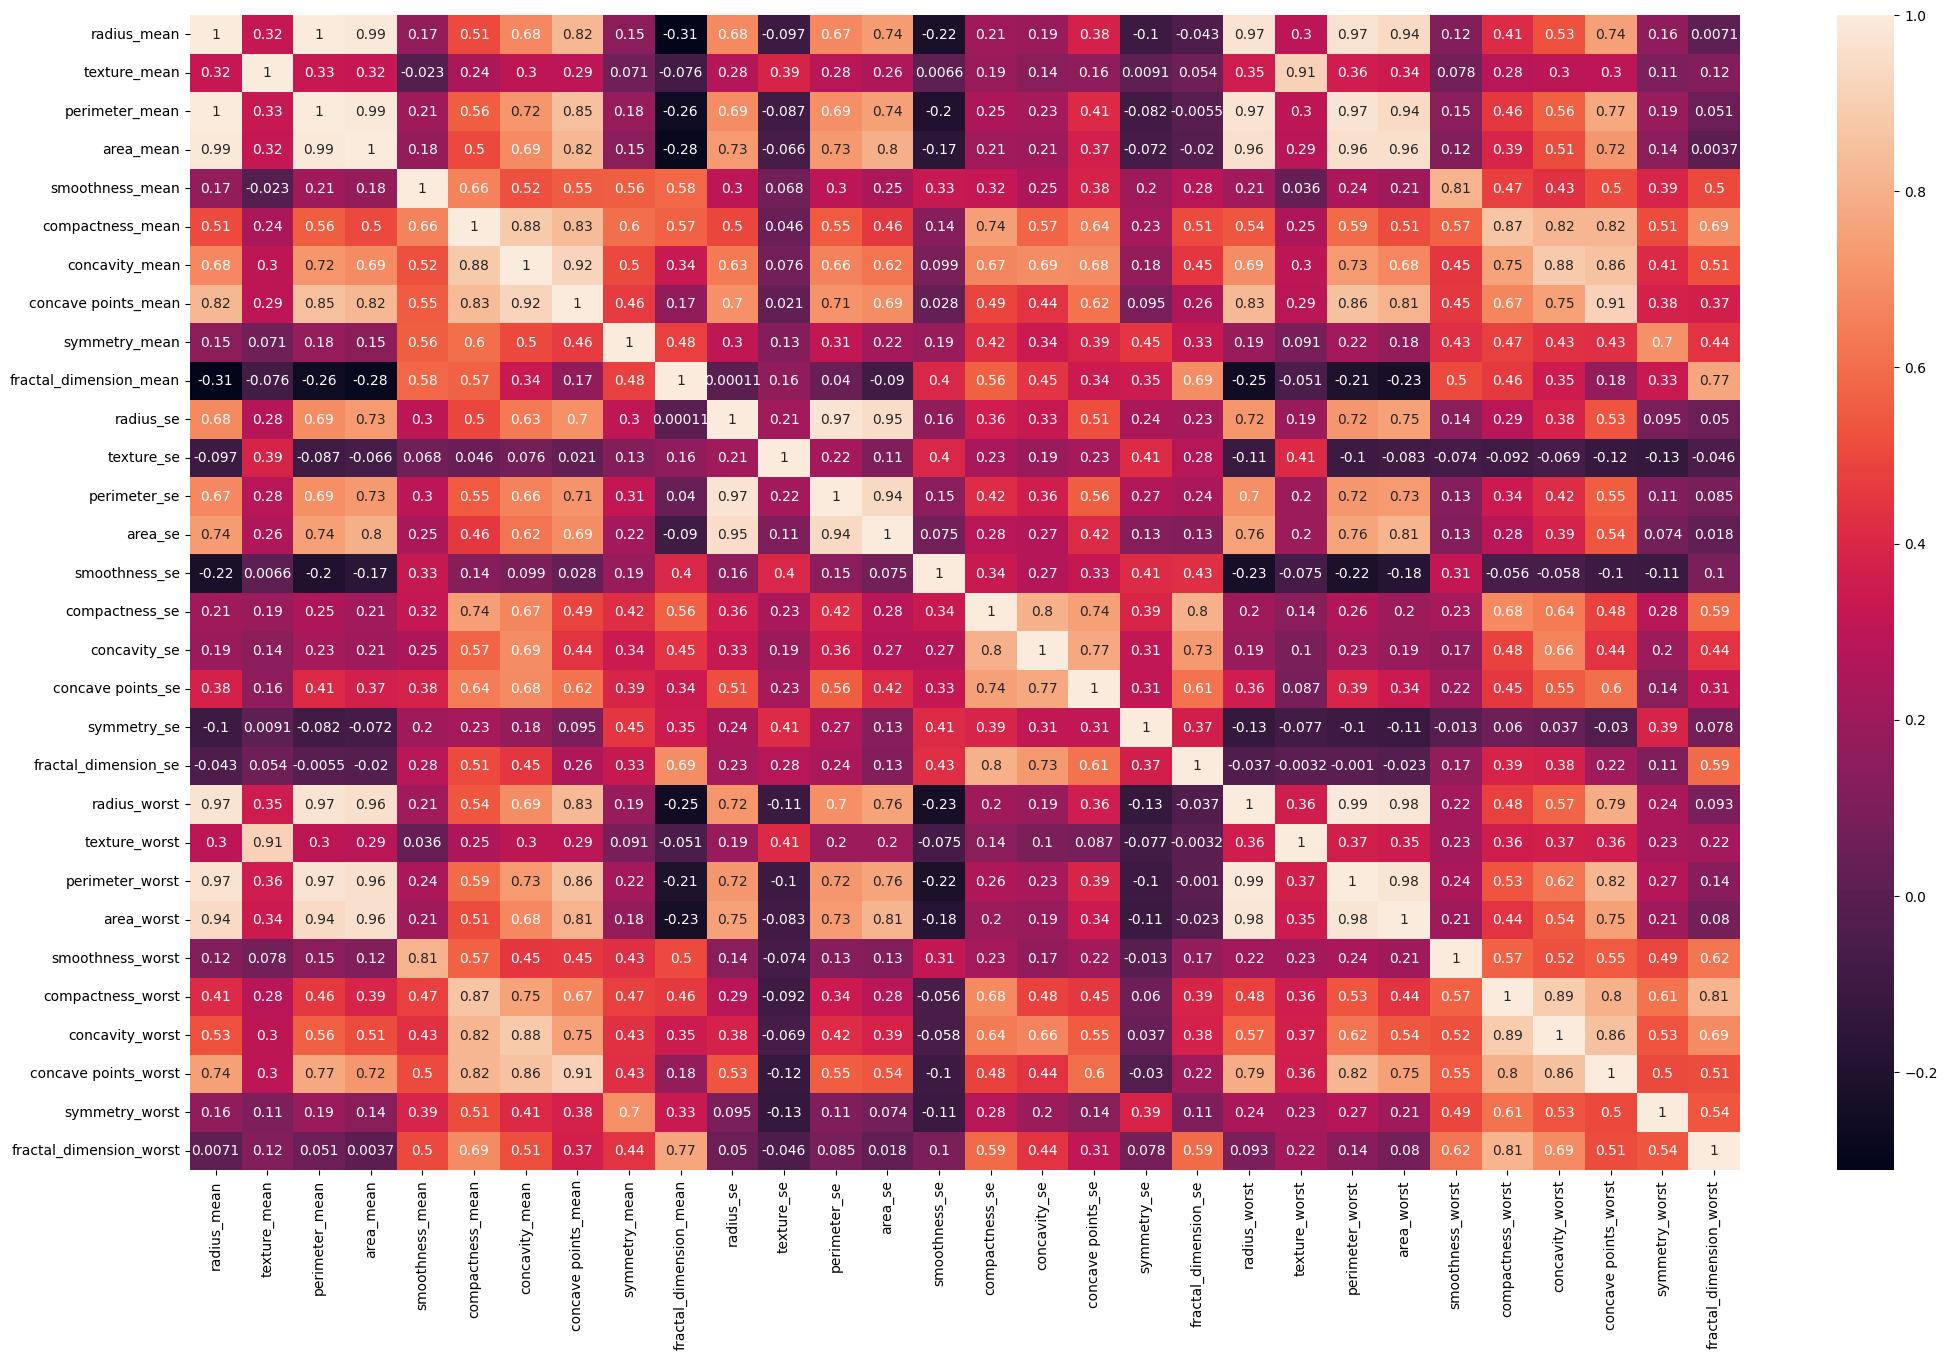

In [ ]:
# Create heatmap of correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True)

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [ ]:
# ANSWER

# set diagonsis as target variable
y = raw_df['diagnosis']

# number of classes
n_classes = len(np.unique(y))
print('Number of classes:', n_classes)

Number of classes: 2


### 4. What is the baseline accuracy?

In [ ]:
# ANSWER
# predicted the most frequent class
baseline_accuracy = (y == 'B').mean()
print('Baseline accuracy:', baseline_accuracy)

Baseline accuracy: 0.6274165202108963


### 5. Choose features to be your predictor variables and set up your X.

In [ ]:
# ANSWER

# set target
y = raw_df['diagnosis']

# set features
X = raw_df.drop(columns='diagnosis')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [ ]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [ ]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_pred = knn.predict(X)

# store the predicted response values
accuracy = accuracy_score(y, y_pred)
print('Accuracy:', accuracy)

# it is better than the baseline, but it is definitely not legitimate due to the answers already used to be trained

Accuracy: 1.0


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [ ]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# STEP 2: train the model on the training set (using K=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9298245614035088


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [19]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors=len(X_train.columns))

# Fit Train Data
knn.fit(X_train, y_train)
    
# Print accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9473684210526315


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [20]:
# ANSWER
# plot test accuracy by number of neighbors:

# create a list to store the test accuracy for each value of K
test_accuracy = []

# loop over values of K from 1 to the number of rows in the training data
for k in range(1, len(X_train.columns)):
    # create the classifier with K neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # fit the model to the training data
    knn.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = knn.predict(X_test)

    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # store the test accuracy in the list
    test_accuracy.append(accuracy)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [21]:
# ANSWER
# create a list of values of K to try
k_values = np.arange(1, len(X_train.columns))

# create a list to store the mean cross-validated accuracy for each value of K
cv_accuracy = []

# loop over values of K
for k in k_values:
    # create the classifier with K neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # perform 5-fold cross-validation and store the test score for each fold
    scores = cross_val_score(knn, X_train, y_train, cv=5)

    # calculate the mean test score for the 5 folds
    mean_score = np.mean(scores)

    # store the mean test score in the list
    cv_accuracy.append(mean_score)

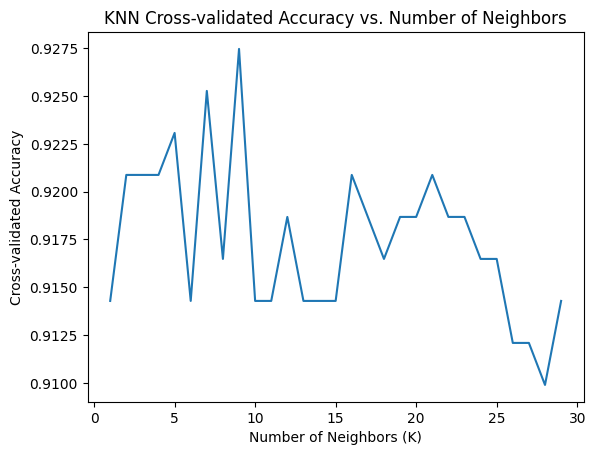

In [22]:
# plot the mean cross-validated accuracy vs. the number of neighbors
plt.plot(k_values, cv_accuracy)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-validated Accuracy')
plt.title('KNN Cross-validated Accuracy vs. Number of Neighbors')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [24]:
# ANSWER
# Standarize X

# create a pipeline that includes scaling and KNN
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())])

# empty list to append into
standard_cv_accuracy = []

# perform cross-validation for each value of K
for k in k_values:
    pipe.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    standard_cv_accuracy.append(scores.mean())

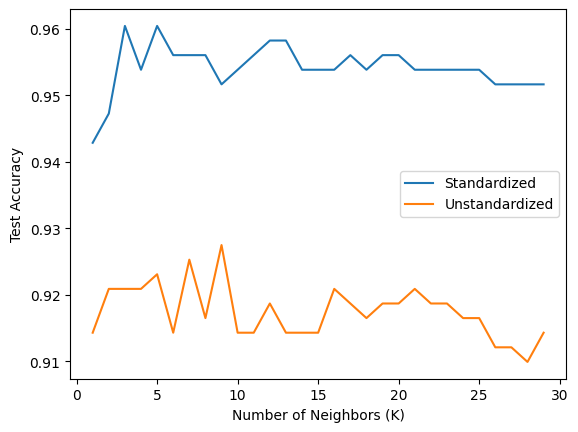

In [26]:
# ANSWER
# plot test accuracy by number of neighbors:

plt.plot(k_values, standard_cv_accuracy, label='Standardized')
plt.plot(k_values, cv_accuracy, label='Unstandardized')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

# Standardized is better as it has a higher accuracy score
# This is due to making sure that all variables are on the same scale and can be compared directly.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



